# DFT Convolutions

### Uncomment for BNI-3f

In [ ]:
# array = [
#     [0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0.9206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6406, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0.07943],
#     [0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6406, 0, 0, 0, 0.6406, 0.07943, 0, 0, 0, 0, 0.07943, 0, 0, 0.07943, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07943, 0.07943, 0, 0]
# ]

# # Example usage (assuming 'A' and 'b' are defined)

# A_matrix = np.array(array)

# # Initializing the B Vector
# b = [0.4, 0.1, 0.2, 0.05, 0.05, 0, 0.2]
# b_array = np.array(b)
# b_array =np.array(b_found)

# # Print the rounded matrix
# print(b_array)
# print()
# print(np.round(A_matrix.T, 4))

### With 1 triangle

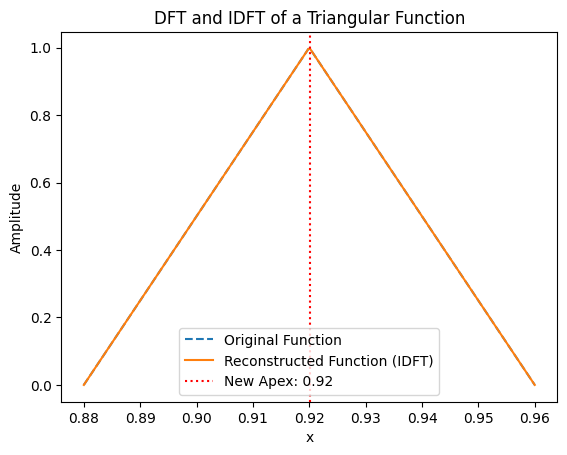

New Apex (after IDFT): 0.920156862745098


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def triangle_function(tri):

    min_val, apex, max_val = tri
    x = np.linspace(min_val, max_val, 256)
    y = np.maximum(0, np.minimum((x - min_val) / (apex - min_val), (max_val - x) / (max_val - apex)))
    return x, y

def perform_dft_and_idft(tri):

    # Create the triangular function
    x, y = triangle_function(tri)

    # Perform DFT (Fourier Transform)
    dft_y = np.fft.fft(y)

    # Perform IDFT (Inverse Fourier Transform) to reconstruct the signal
    idft_y = np.fft.ifft(dft_y)

    # Since the IDFT result might have small imaginary parts due to numerical precision,
    # we take only the real part (the imaginary part should be nearly zero).
    reconstructed_y = np.real(idft_y)

    # Find the index of the maximum value in the reconstructed function (new apex)
    new_apex_index = np.argmax(reconstructed_y)
    
    # Get the corresponding x-value for the new apex
    new_apex = x[new_apex_index]

    return x, y, reconstructed_y, new_apex

# Define the triangular function [min, apex, max]
triangle = [0.88, 0.92, 0.96]

# Perform DFT and IDFT on the triangle function
x, original_y, reconstructed_y, new_apex = perform_dft_and_idft(triangle)

# Plot the original and reconstructed functions
plt.plot(x, original_y, label='Original Function', linestyle='--')
plt.plot(x, reconstructed_y, label='Reconstructed Function (IDFT)', linestyle='-')
plt.axvline(x=new_apex, color='r', linestyle=':', label=f'New Apex: {new_apex:.2f}')
plt.title('DFT and IDFT of a Triangular Function')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Print the new apex
print(f"New Apex (after IDFT): {new_apex}")


## With 3 Triangles

This seems to be working very well

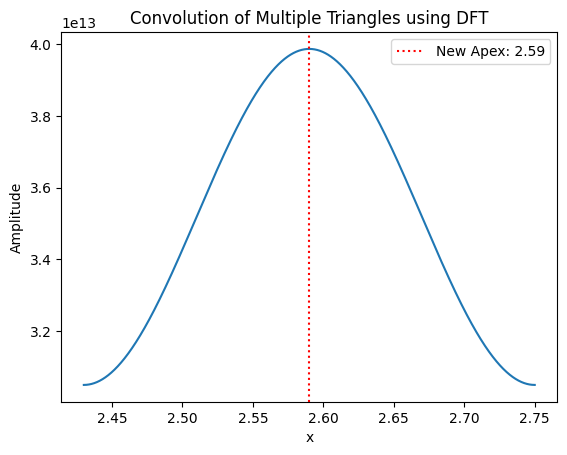

New Apex (after convolution): 2.589999971389769


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def triangle_function(tri):
    min_val, apex, max_val = tri
    x = np.linspace(min_val, max_val, 2**24)
    y = np.maximum(0, np.minimum((x - min_val) / (apex - min_val), (max_val - x) / (max_val - apex)))
    return x, y

def convolve_triangles_dft(triangles):

    # Calculate the support of the convoluted function
    min_val = sum(tri[0] for tri in triangles)
    max_val = sum(tri[2] for tri in triangles)
    x = np.linspace(min_val, max_val, 2**24)

    # Perform DFT on each triangle and multiply in frequency domain
    dft_result = np.fft.fft(triangle_function(triangles[0])[1])
    for tri in triangles[1:]:
        dft_result *= np.fft.fft(triangle_function(tri)[1])

    # Perform IDFT to get the convoluted function
    y = np.fft.ifft(dft_result)

    # Ensure y is real-valued
    y = np.real(y)
    #y= y/np.sum(y)

    # Find the new apex
    new_apex_index = np.argmax(y)
    new_apex = x[new_apex_index]

    return x, y, new_apex


# Define the triangular functions
triangles = [
    [0.88, 0.92, 0.96],
    [0.75, 0.85, 0.95],
    [0.80, 0.82, 0.84]
]

#triangles = [ [0.88, 0.92, 0.96]]

# Convolve the triangles using DFT
x, y, new_apex = convolve_triangles_dft(triangles)

# Plot the result
plt.plot(x, y)
plt.title('Convolution of Multiple Triangles using DFT')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.axvline(x=new_apex, color='r', linestyle=':', label=f'New Apex: {new_apex:.2f}')
plt.legend()
plt.show()

# Print the new apex
print(f"New Apex (after convolution): {new_apex}")

## Sampling from convolution result

seems accurate to me

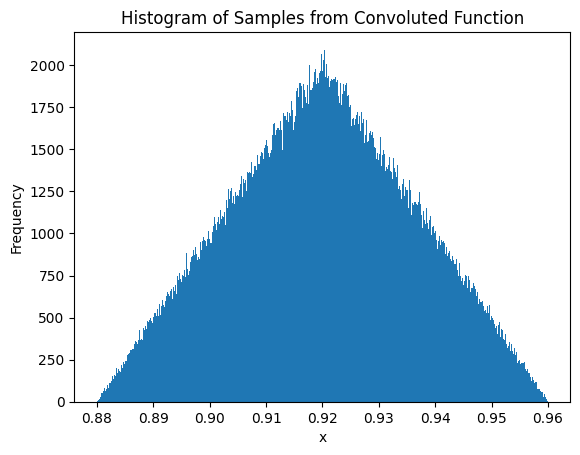

In [105]:
import numpy as np
import matplotlib.pyplot as plt


# Define the triangular functions

# Convolve the triangles using DFT
x, y, new_apex = convolve_triangles_dft(triangles)
y = np.maximum(0, y)

# Sample from the convoluted function
num_samples = 1000000  # Number of samples to draw
samples = np.random.choice(x, size=num_samples, p=y / np.sum(y))

# Plot the histogram of the samples
plt.hist(samples, bins=1000)
plt.title('Histogram of Samples from Convoluted Function')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

## Convolution with 10 Triangles Via DFT

Numerically unstable

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


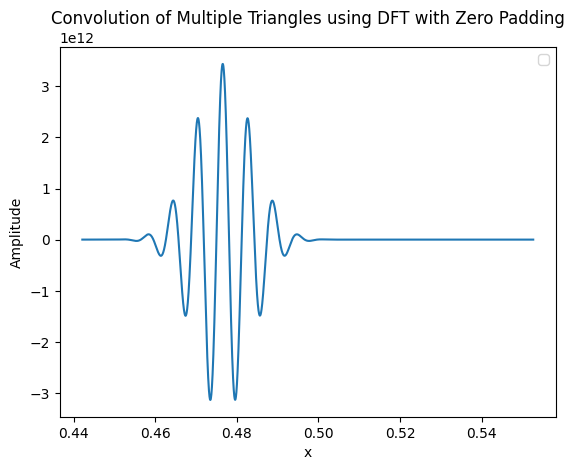

New Apex (after convolution): 4.765241025641026


In [46]:
import numpy as np
import matplotlib.pyplot as plt

def triangle_function(tri, zero_padding=2**12):
    # Define the triangle function with some zero padding to prevent aliasing
    bits_of_accuracy = 8
    min_val, apex, max_val = tri
    x = np.linspace(min_val, max_val, 2**bits_of_accuracy)
    y = np.maximum(0, np.minimum((x - min_val) / (apex - min_val), (max_val - x) / (max_val - apex)))
    y -= np.mean(y)  # Remove DC offset if desired
    
    # Zero-pad `y` by extending its length
    y = np.pad(y, (0, zero_padding - len(y)), 'constant')
    return x, y

def convolve_triangles_dft(triangles, zero_padding=2**12):
    bits_of_accuracy = 8
    min_val = sum(tri[0] for tri in triangles)
    max_val = sum(tri[2] for tri in triangles)
    x = np.linspace(min_val, max_val, zero_padding)  # Extend x with zero padding

    # Initialize DFT with zero-padded first triangle
    _, y = triangle_function(triangles[0], zero_padding=zero_padding)
    dft_result = np.fft.fft(y)
    
    for tri in triangles[1:]:
        _, y = triangle_function(tri, zero_padding=zero_padding)
        dft_result *= np.fft.fft(y)
        dft_result /= np.sum(dft_result)  # Normalize at each step to avoid amplitude drift

    # Perform IDFT to get the convoluted function
    y = np.fft.ifft(dft_result)
    y = np.real(y)  # Ensure result is real

    # Find the new apex
    new_apex_index = np.argmax(y)
    new_apex = x[new_apex_index]
    
    return x, y, new_apex

# Define the triangular functions
triangles = [
    [0.4827, 0.5430, 0.6033],
    [0.5190, 0.5839, 0.6487],
    [0.1030, 0.1159, 0.1288],
    [0.0691, 0.0777, 0.0863],
    [0.4164, 0.4685, 0.5206],
    [0.4662, 0.5245, 0.5827],
    [0.7579, 0.8527, 0.9474],
    [0.3064, 0.3447, 0.3830],
    [0.5370, 0.6042, 0.6713],
    [0.7634, 0.8589, 0.9543]
]

# Convolve the triangles using DFT with zero padding
x, y, new_apex = convolve_triangles_dft(triangles)

# Plot the result
plt.plot(x / 10, y)
plt.title('Convolution of Multiple Triangles using DFT with Zero Padding')
plt.xlabel('x')
#plt.xlim([0,1])
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Print the new apex
print(f"New Apex (after convolution): {new_apex}")


## Trying with odd number

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


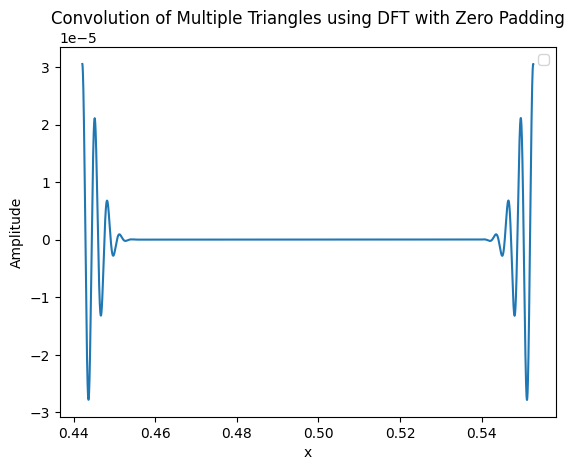

New Apex (after convolution): 5.526298800585974


In [81]:
import numpy as np
import matplotlib.pyplot as plt

def triangle_function(tri, zero_padding=2**15):
    # Ensure an odd number of points for symmetry
    bits_of_accuracy = 10
    num_points = 2**bits_of_accuracy
    if num_points % 2 == 0:
        num_points += 1  # Adjust to be odd if necessary

    min_val, apex, max_val = tri
    x = np.linspace(min_val, max_val, num_points)
    y = np.maximum(0, np.minimum((x - min_val) / (apex - min_val), (max_val - x) / (max_val - apex)))
    y -= np.mean(y)  # Optional: Remove DC offset

    # Calculate symmetrical padding
    total_padding = zero_padding - len(y)
    pad_left = total_padding // 2
    pad_right =  pad_left

    # Apply symmetrical zero padding
    y = np.pad(y, (pad_left, pad_right), 'constant')
    return x, y

def convolve_triangles_dft(triangles, zero_padding=2**15):
    min_val = sum(tri[0] for tri in triangles)
    max_val = sum(tri[2] for tri in triangles)
    x = np.linspace(min_val, max_val, (zero_padding-1))  # Extend x with zero padding

    # Initialize DFT with zero-padded first triangle
    _, y = triangle_function(triangles[0], zero_padding=zero_padding)
    dft_result = np.fft.fft(y)
    
    for tri in triangles[1:]:
        _, y = triangle_function(tri, zero_padding=zero_padding)
        dft_result *= np.fft.fft(y)
        dft_result /= np.sum(dft_result)  # Normalize at each step to avoid amplitude drift

    # Perform IDFT to get the convoluted function
    y = np.fft.ifft(dft_result)
    y = np.real(y)  # Ensure result is real

    # Find the new apex
    new_apex_index = np.argmax(y)
    new_apex = x[new_apex_index]
    
    return x, y, new_apex

# Define the triangular functions
triangles = [
    [0.4827, 0.5430, 0.6033],
    [0.5190, 0.5839, 0.6487],
    [0.1030, 0.1159, 0.1288],
    [0.0691, 0.0777, 0.0863],
    [0.4164, 0.4685, 0.5206],
    [0.4662, 0.5245, 0.5827],
    [0.7579, 0.8527, 0.9474],
    [0.3064, 0.3447, 0.3830],
    [0.5370, 0.6042, 0.6713],
    [0.7634, 0.8589, 0.9543]
]

# Convolve the triangles using DFT with zero padding
x, y, new_apex = convolve_triangles_dft(triangles)

# Plot the result
plt.plot(x / 10, y)
plt.title('Convolution of Multiple Triangles using DFT with Zero Padding')
plt.xlabel('x')
#plt.xlim([0,1])
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Print the new apex
print(f"New Apex (after convolution): {new_apex}")


## Using time based convolution  - Flip and Slide

Much more robust, but slower

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


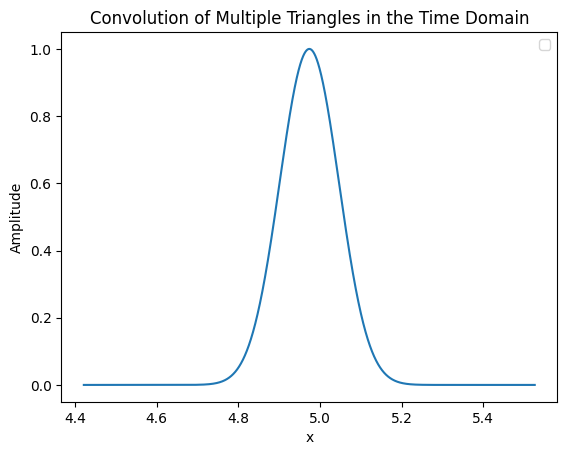

Mode (Peak) Location: 4.973820462985099, Amplitude: 1.0


In [82]:
import numpy as np
import matplotlib.pyplot as plt

def triangle_function(tri, num_points=12550):
    min_val, apex, max_val = tri
    x = np.linspace(min_val, max_val, num_points)
    y = np.maximum(0, np.minimum((x - min_val) / (apex - min_val), (max_val - x) / (max_val - apex)))
    return x, y

def convolve_triangles_time_domain(triangles, num_points=12550):
    # Initialize with the first triangle
    _, y = triangle_function(triangles[0], num_points=num_points)
    total_min = triangles[0][0]
    total_max = triangles[0][2]
    
    # Iteratively convolve with remaining triangles and update range
    for tri in triangles[1:]:
        _, y2 = triangle_function(tri, num_points=num_points)
        y = np.convolve(y, y2, mode='full')
        
        # Update total min and max range after each convolution
        total_min += tri[0]
        total_max += tri[2]
    
    # Normalize only once after all convolutions
    y /= np.max(y)
    
    # Adjust x-axis scaling based on cumulative min and max
    x = np.linspace(total_min, total_max, len(y))
    return x, y

# Define the triangular functions
triangles = [
    [0.4827, 0.5430, 0.6033],
    [0.5190, 0.5839, 0.6487],
    [0.1030, 0.1159, 0.1288],
    [0.0691, 0.0777, 0.0863],
    [0.4164, 0.4685, 0.5206],
    [0.4662, 0.5245, 0.5827],
    [0.7579, 0.8527, 0.9474],
    [0.3064, 0.3447, 0.3830],
    [0.5370, 0.6042, 0.6713],
    [0.7634, 0.8589, 0.9543]
]

# Convolve the triangles in the time domain
x, y = convolve_triangles_time_domain(triangles)

# Plot the result
plt.plot(x, y)
plt.title('Convolution of Multiple Triangles in the Time Domain')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Find the index of the peak in the y array
mode_index = np.argmax(y)
mode_x = x[mode_index]
mode_y = y[mode_index]

print(f"Mode (Peak) Location: {mode_x}, Amplitude: {mode_y}")
